In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='04-Remove80_n', normalize=True, missing_type='remove', missing_percent=0.8, logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = [predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 132'

'Number of test data points: 33'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=817.232, BIC=831.608, Fit time=0.801 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=839.664, BIC=851.165, Fit time=0.265 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=820.833, BIC=832.334, Fit time=0.603 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=819.230, BIC=836.481, Fit time=1.095 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=868.359, BIC=879.859, Fit time=0.217 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=820.621, BIC=840.747, Fit time=2.910 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=815.100, BIC=832.351, Fit time=0.547 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=819.4

'Train Error (RMSE): 10.908473342500939  Num NaN: 0'

'Test Error (RMSE): 12.979966855979352    Num NaN: 0'

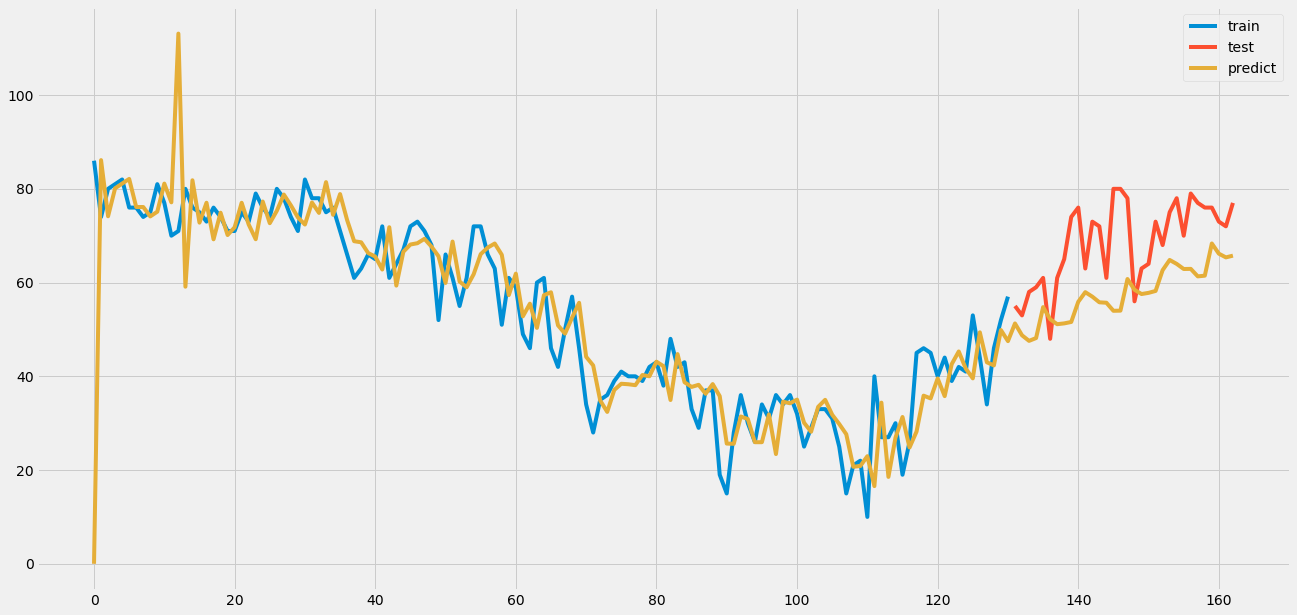

In [4]:
model = ARIMA(analysis=analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error (RMSE): 5.776630994693616  Num NaN: 0'

'Test Error (RMSE): 8.693603970736186    Num NaN: 0'

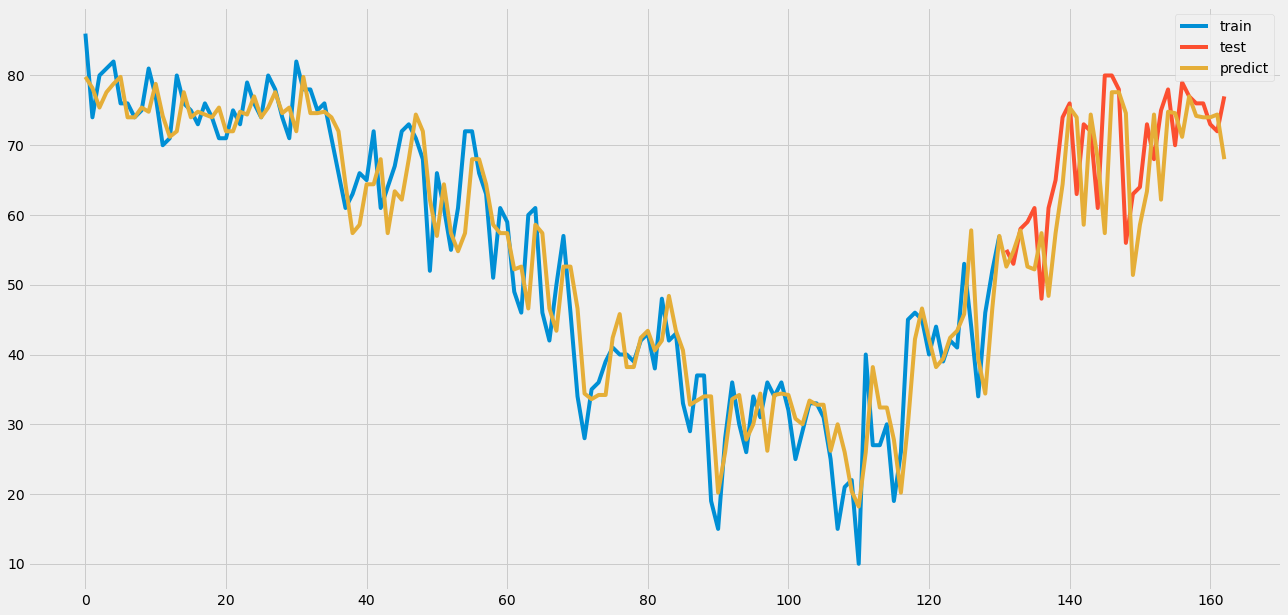

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis=analysis, regressor=KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error (RMSE): 14.212546958023825  Num NaN: 0'

'Test Error (RMSE): 16.75347776370959    Num NaN: 0'

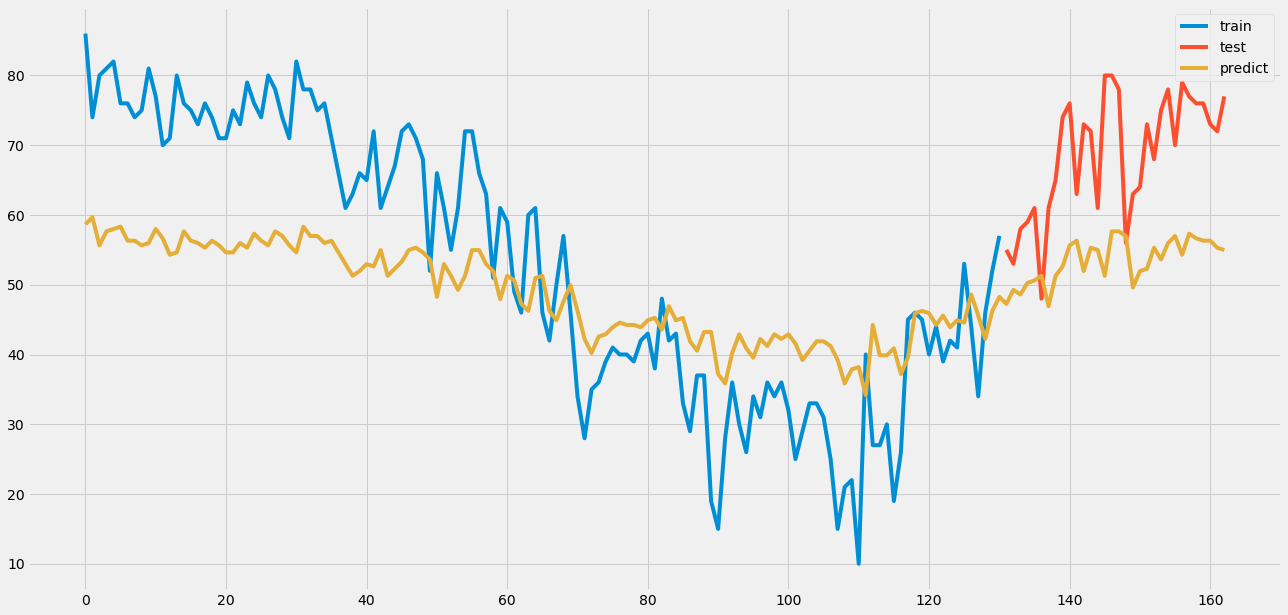

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis=analysis, regressor=SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error (RMSE): 4.889851819709246  Num NaN: 0'

'Test Error (RMSE): 8.992960311475809    Num NaN: 0'

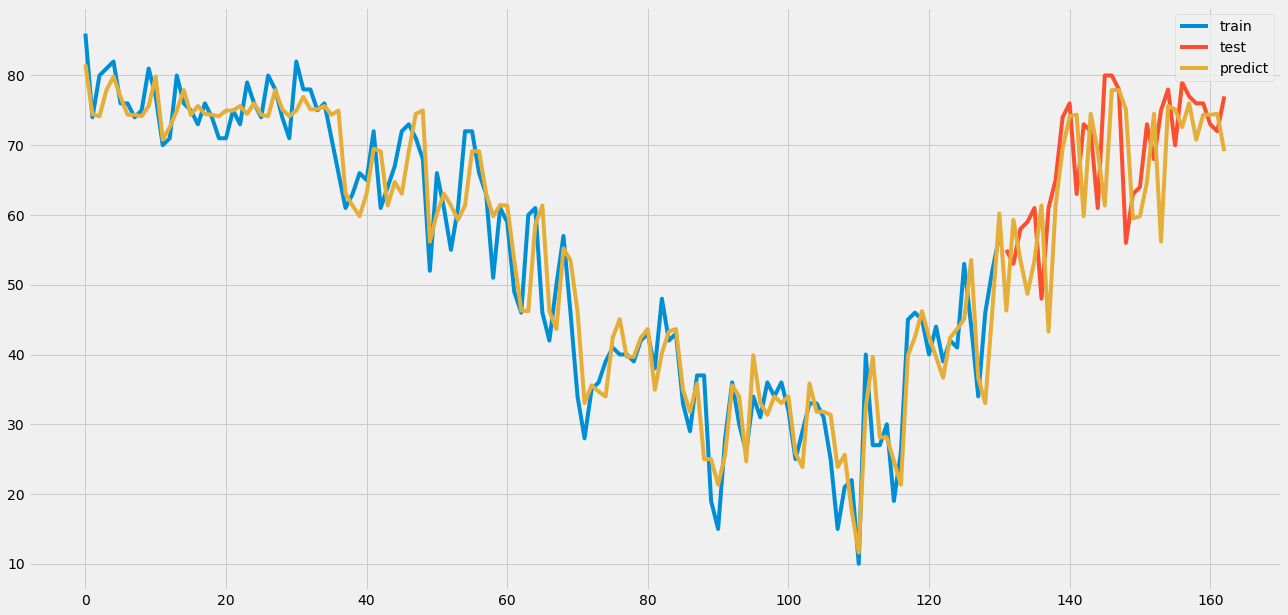

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis=analysis, regressor=RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error (RMSE): 5.930201328131277  Num NaN: 0'

'Test Error (RMSE): 8.363294496977144    Num NaN: 0'

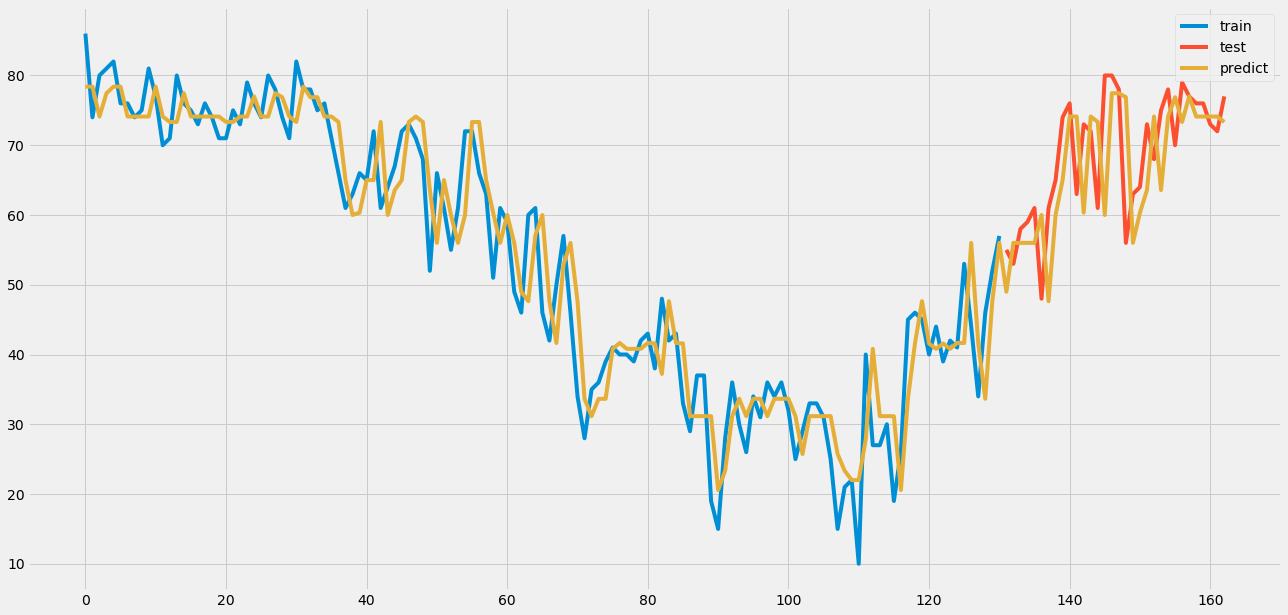

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis=analysis, regressor=AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error (RMSE): 6.473566747346606  Num NaN: 0'

'Test Error (RMSE): 8.321100818229901    Num NaN: 0'

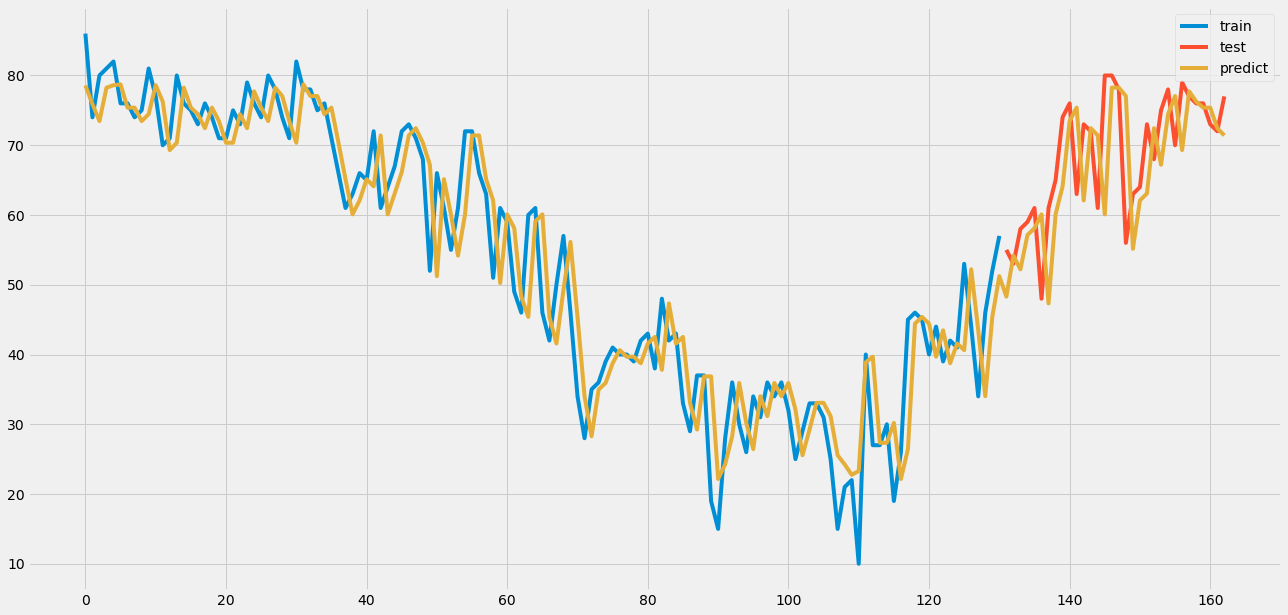

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis=analysis, regressor=GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

Using TensorFlow backend.
D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


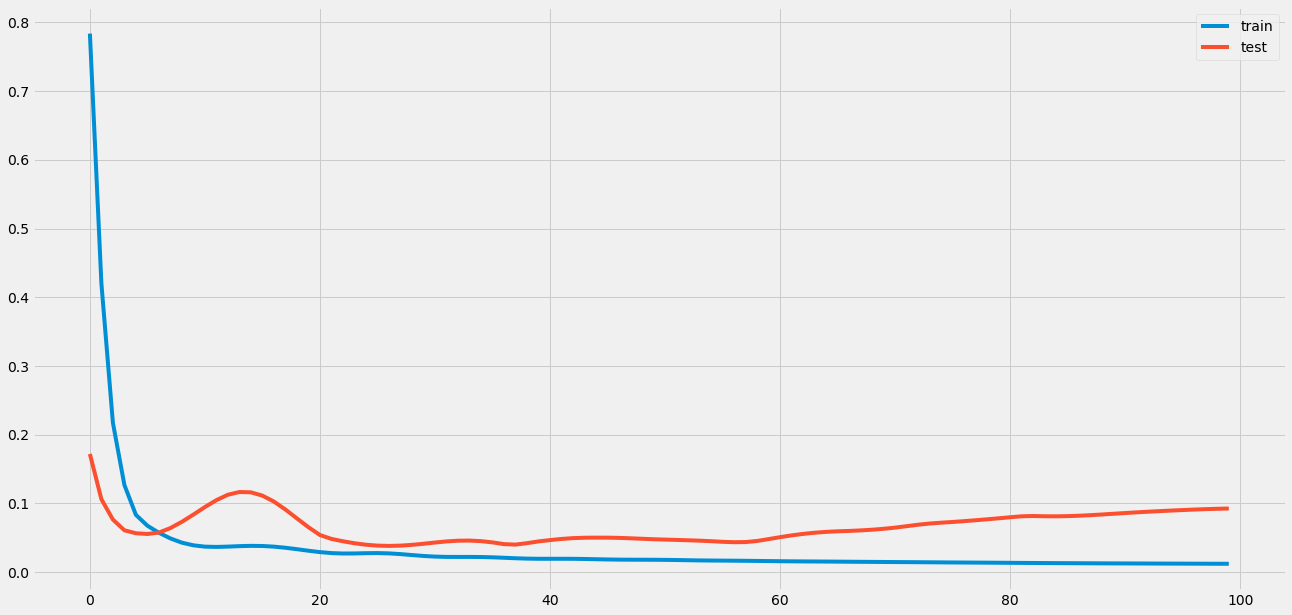

'Train Error (RMSE): 9.414245186911938  Num NaN: 0'

'Test Error (RMSE): 11.003028130747124    Num NaN: 0'

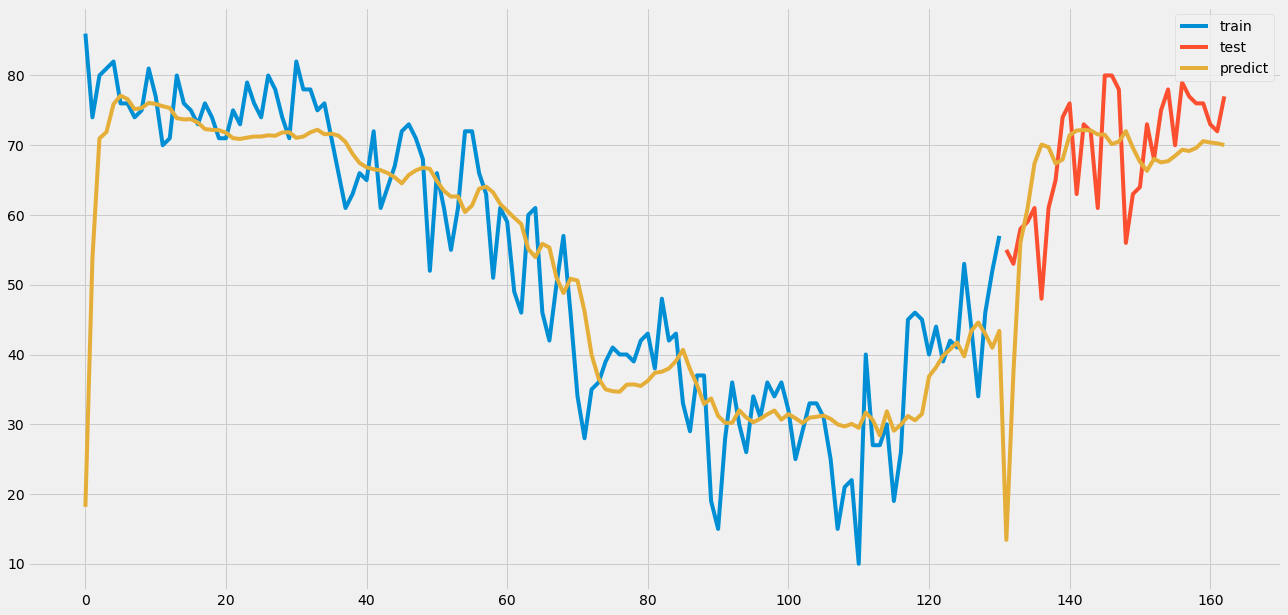

In [10]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNAll(analysis=analysis, model=nn, fit_config={'epochs': 100, 'shuffle': False})
analysis.run_model(model, name='RNNAll')

## Recurrent Neural Network Complete Sequence (LSTM)

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


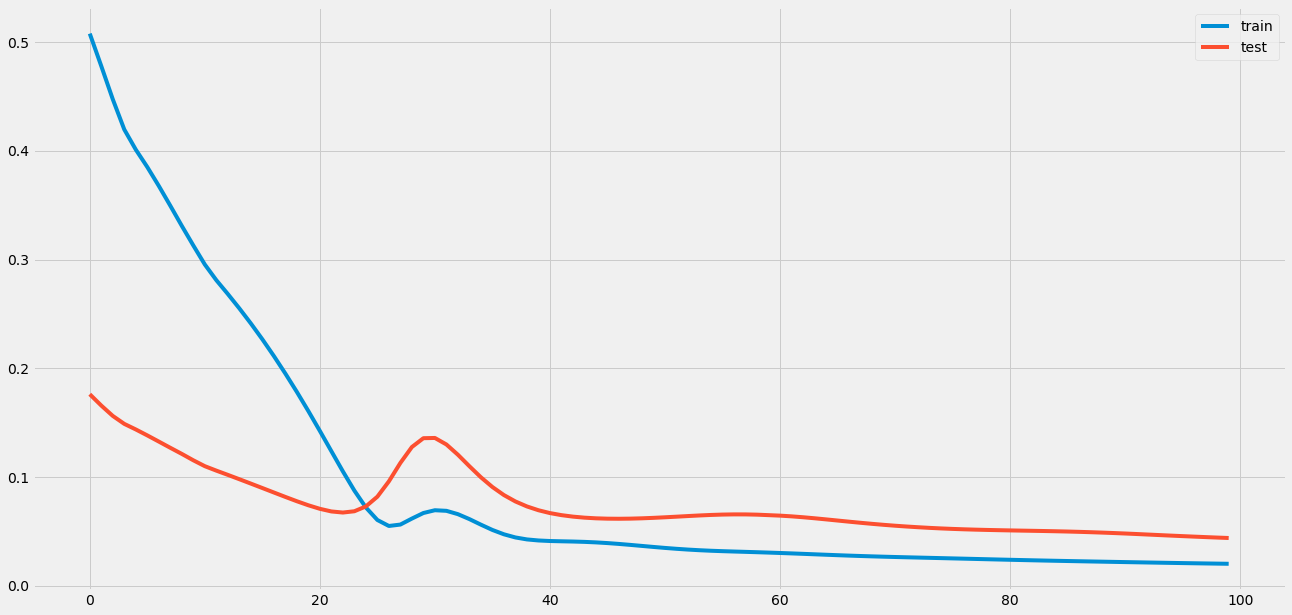

'Train Error (RMSE): 12.144577363985476  Num NaN: 0'

'Test Error (RMSE): 15.069218651095051    Num NaN: 0'

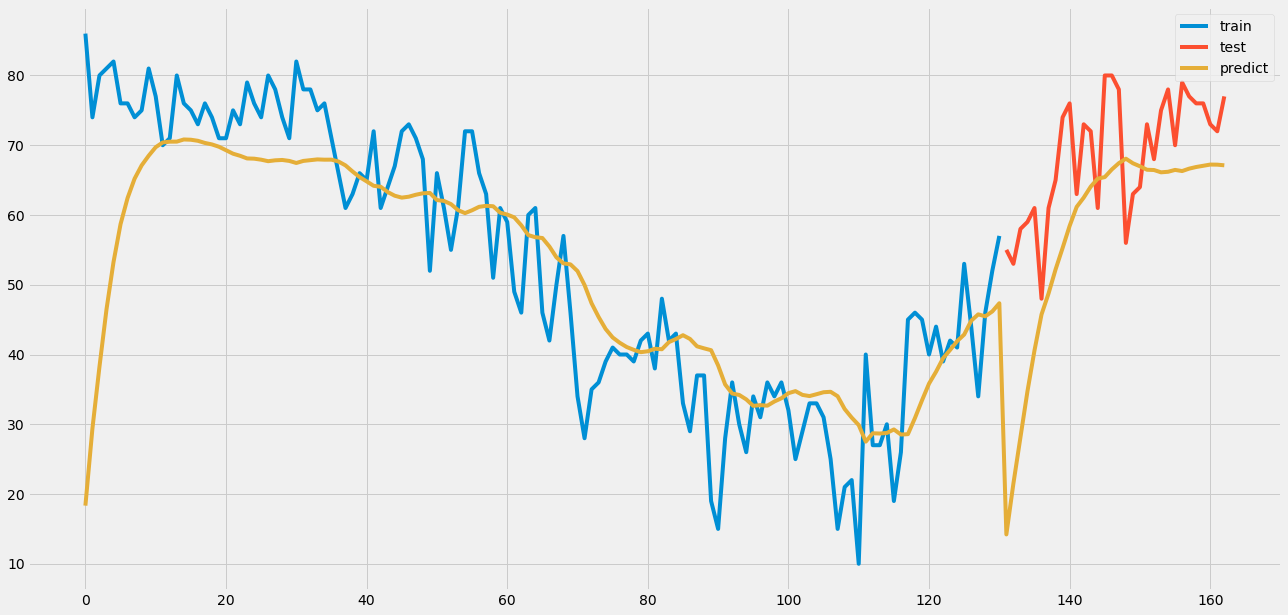

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNAll(analysis=analysis, model=nn, fit_config={'epochs': 100, 'shuffle': False})
analysis.run_model(model, name='LSTMAll')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error (RMSE): 6.42739585737094  Num NaN: 4'

'Test Error (RMSE): 8.030075396526085    Num NaN: 4'

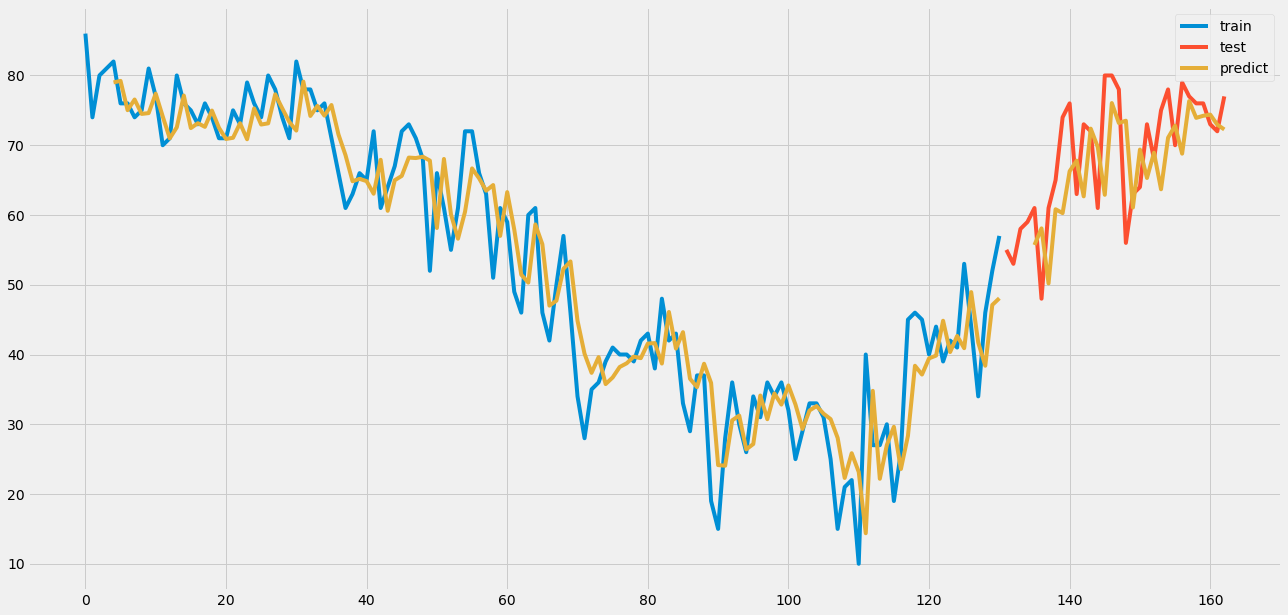

In [12]:
model = LinearRegression(analysis=analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

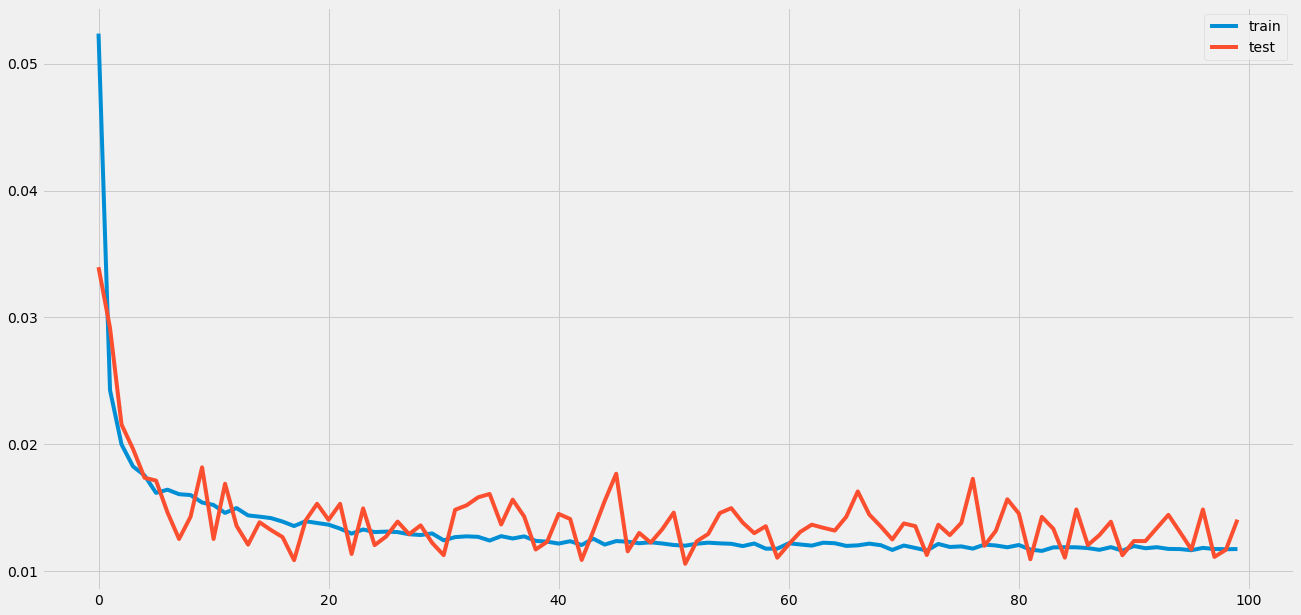

'Train Error (RMSE): 7.6515334472870205  Num NaN: 4'

'Test Error (RMSE): 8.54071996896039    Num NaN: 4'

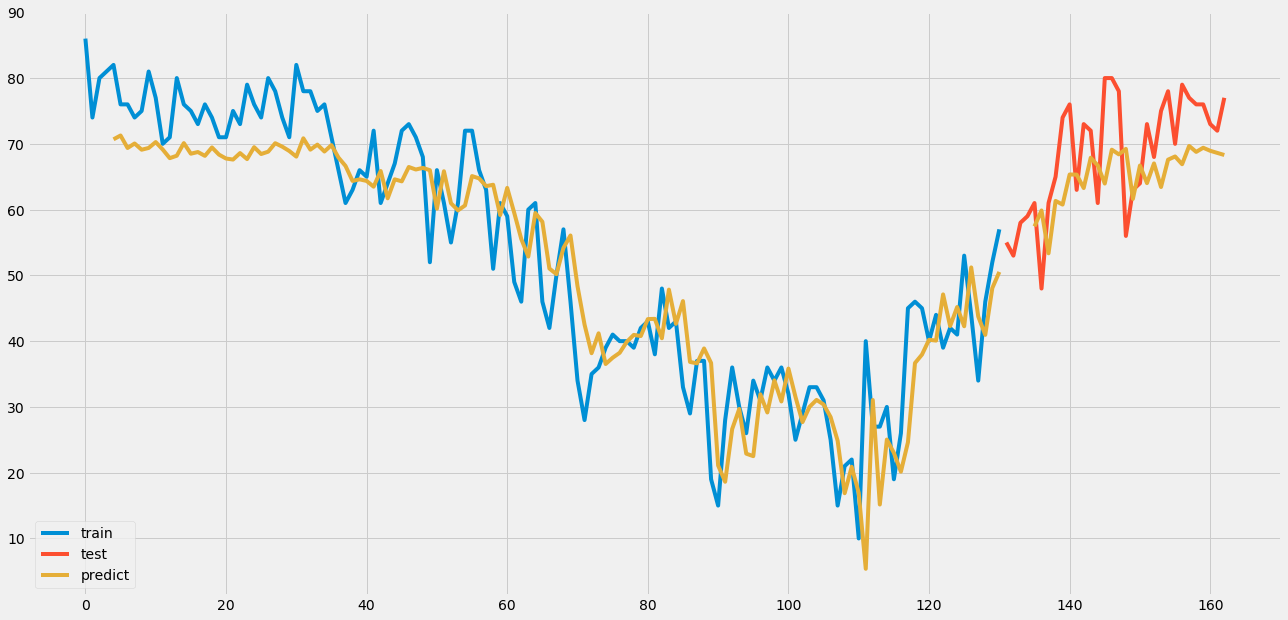

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mse', optimizer='sgd')

model = FNN(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

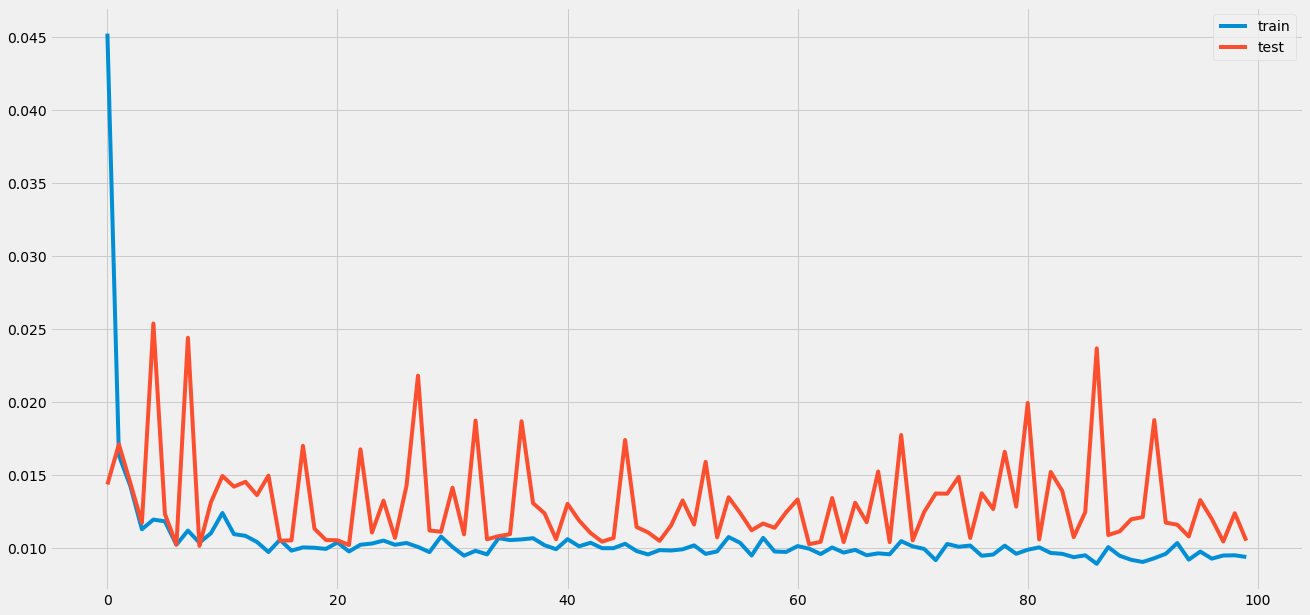

'Train Error (RMSE): 6.949150602498068  Num NaN: 4'

'Test Error (RMSE): 7.376459049030113    Num NaN: 4'

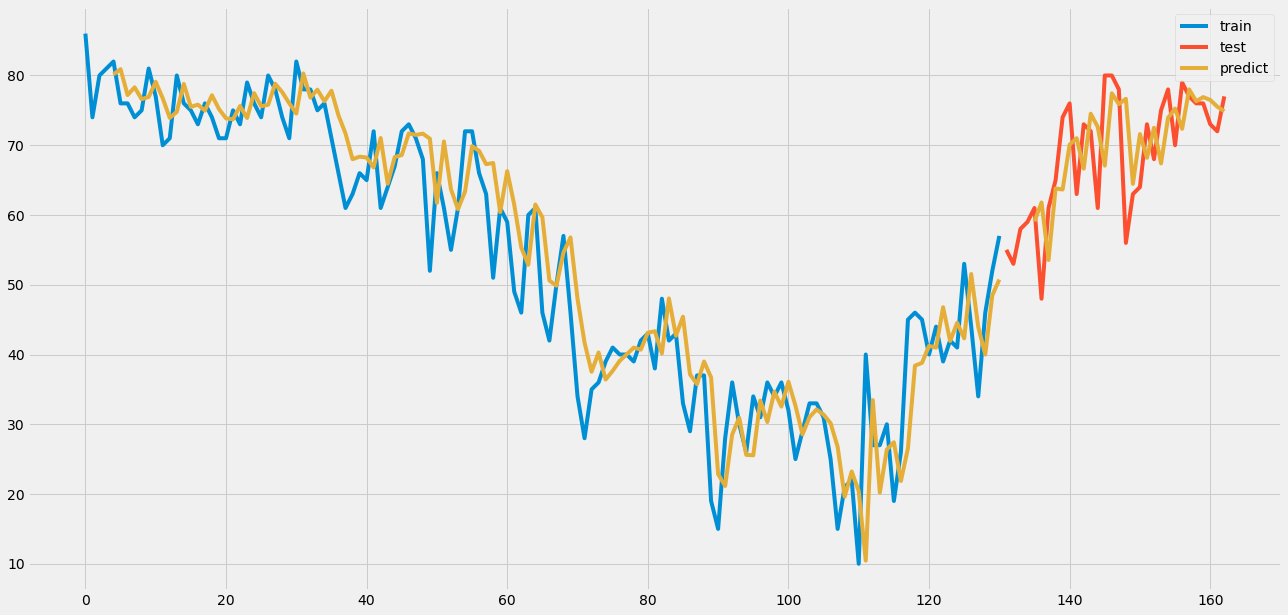

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mse', optimizer='adam')
        
model = RNNSingle(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

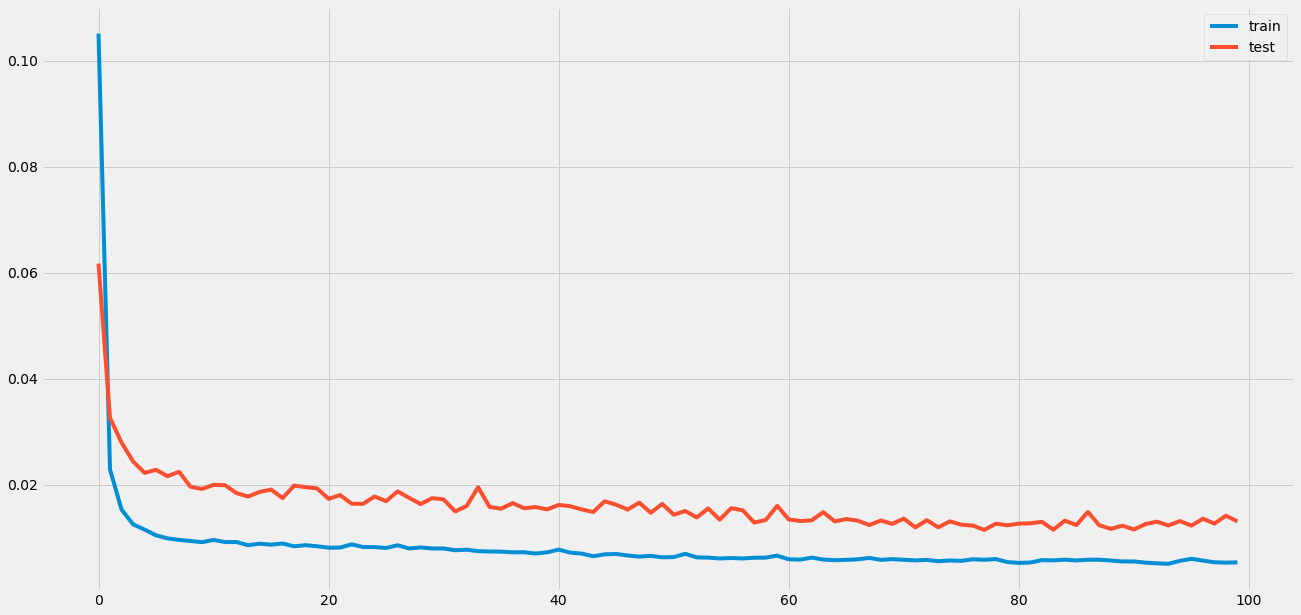

'Train Error (RMSE): 6.00617102469637  Num NaN: 0'

'Test Error (RMSE): 8.384252040902245    Num NaN: 0'

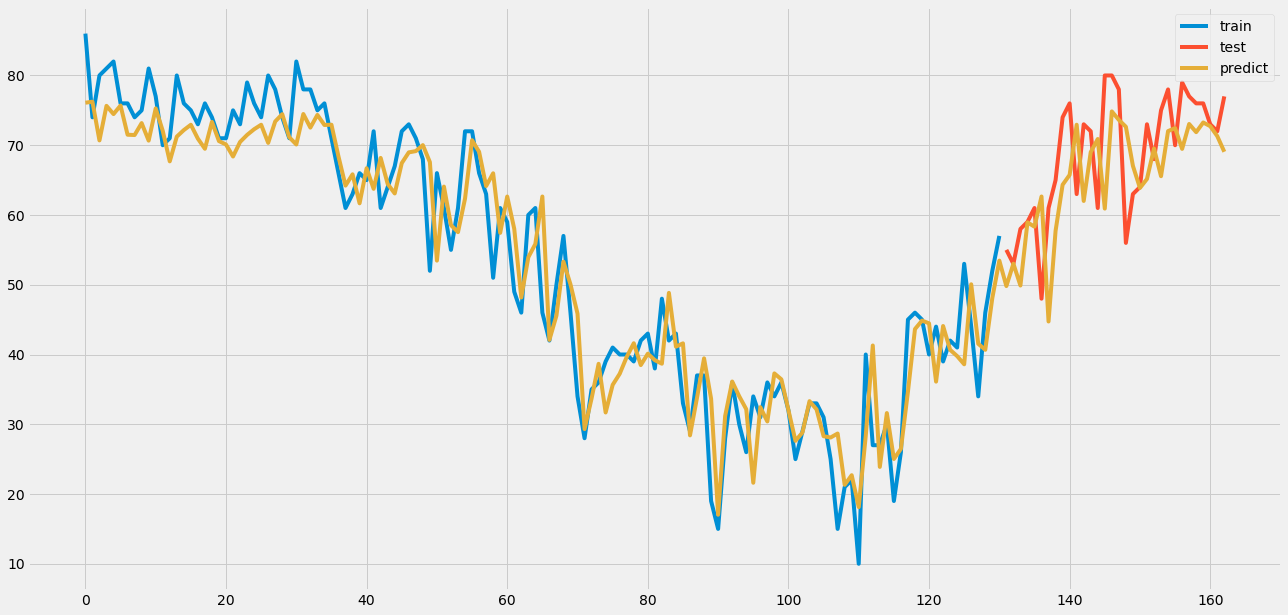

In [15]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNMultiple(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network with Single Output (LSTM)

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

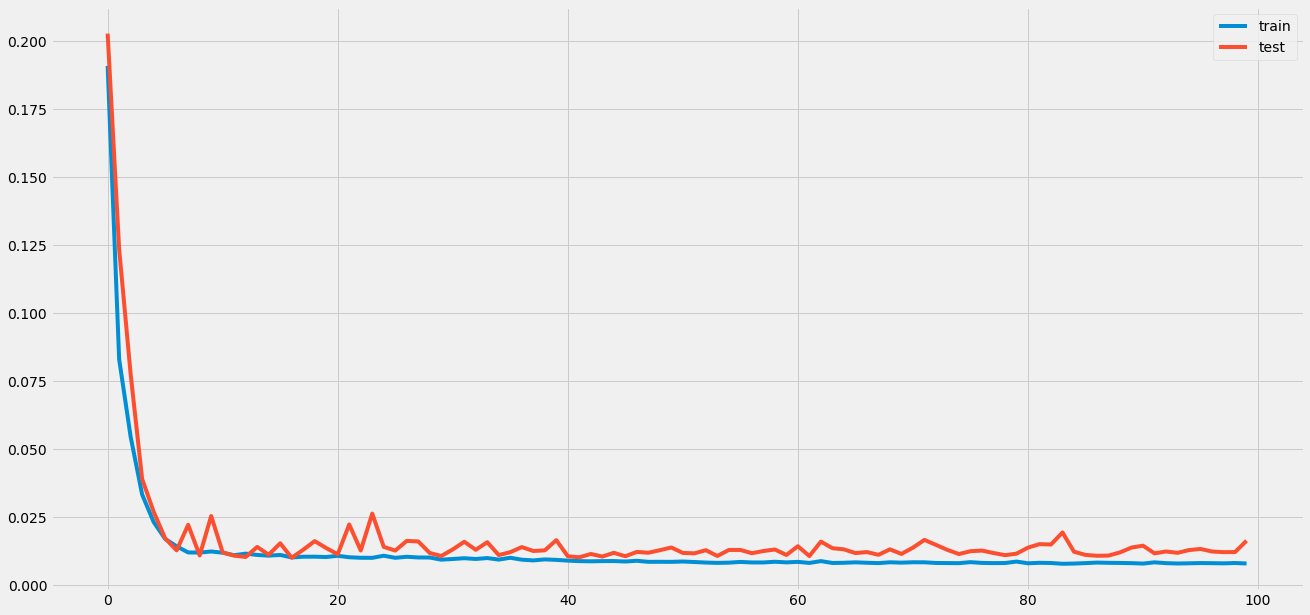

'Train Error (RMSE): 6.561026416258762  Num NaN: 4'

'Test Error (RMSE): 9.207658004431758    Num NaN: 4'

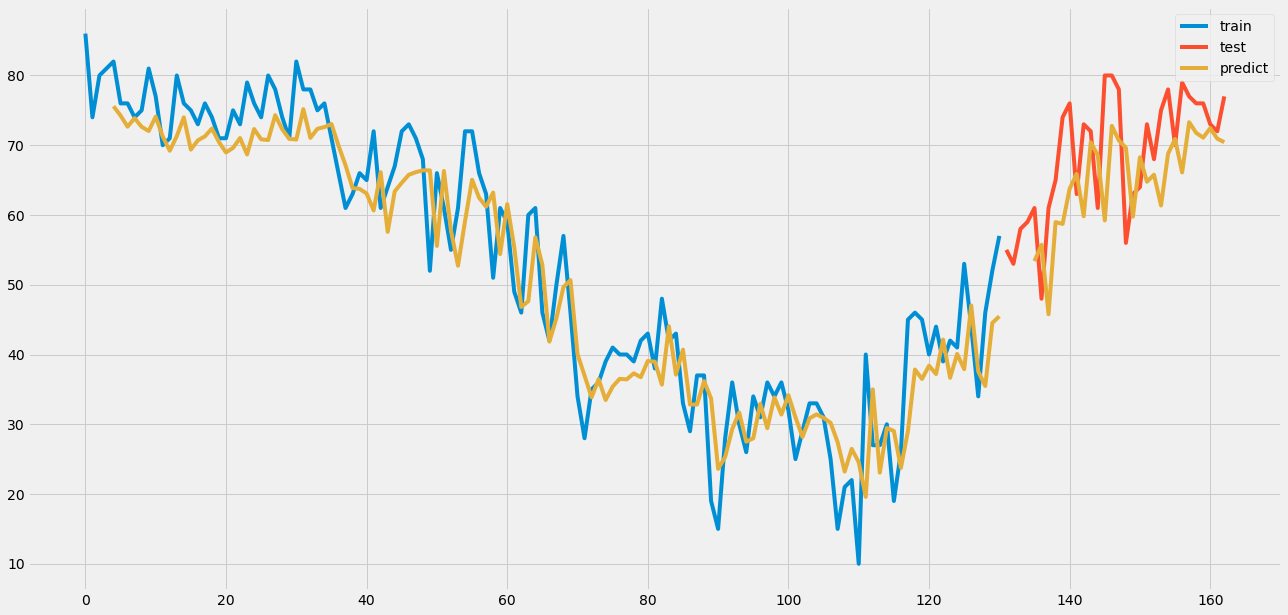

In [16]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mse', optimizer='adam')
        
model = RNNSingle(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='LSTMSingle')

## Recurrent Neural Network with Multiple Outputs (LSTM)

Multiple outputs means that the chunked data is input and the output at each timestep is used.

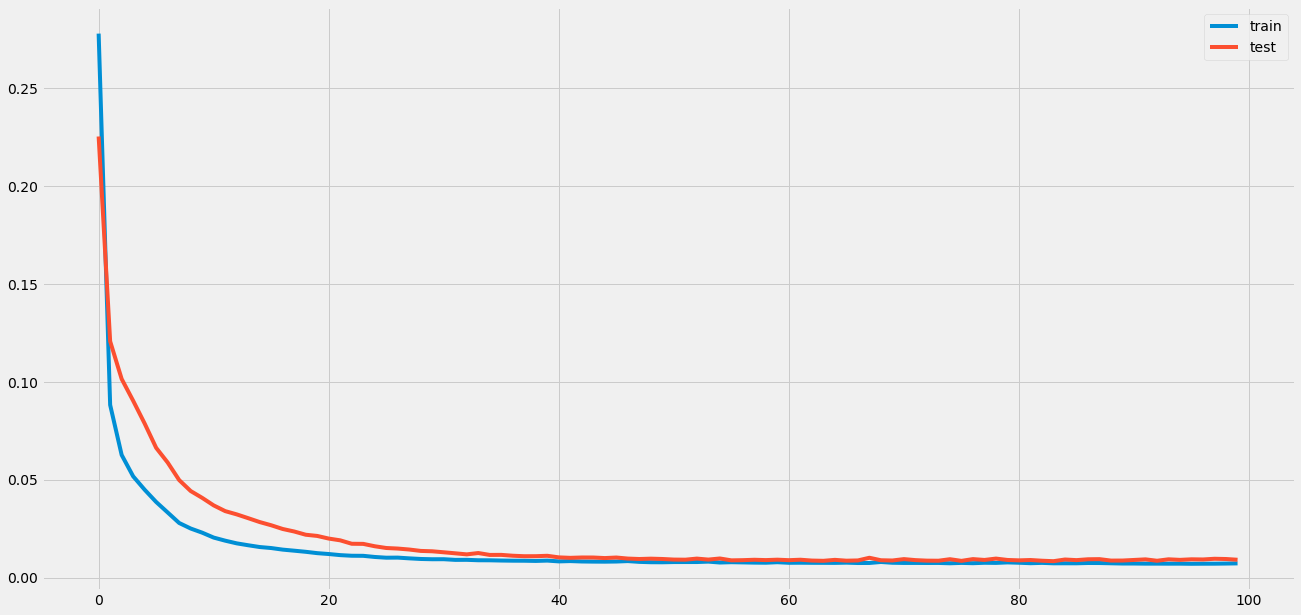

'Train Error (RMSE): 7.2289735608675825  Num NaN: 0'

'Test Error (RMSE): 8.083667557491811    Num NaN: 0'

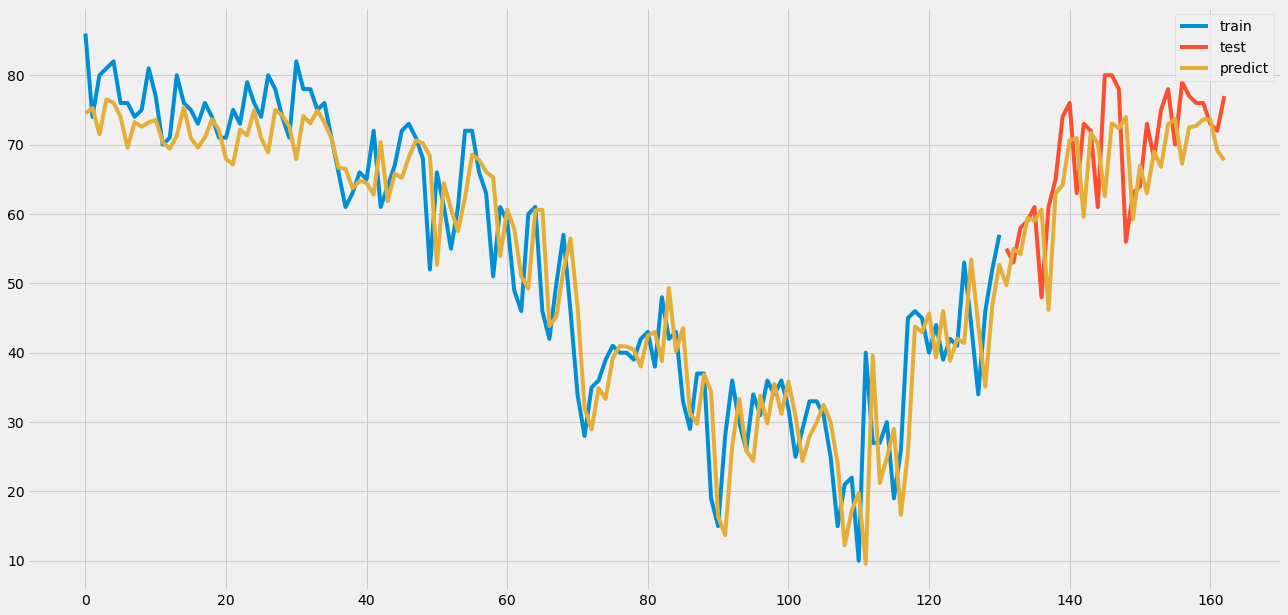

In [17]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNMultiple(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='LSTMMultiple')